# Part I - New York Air Travel During the Month of 9/11/01
## by Sean Ward


## Introduction

### This is a dataset from the Bureau of Transportation Statistics.( https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ ).  It reports flights in the United States showing  extensive arrival and departure delays from 1987 to 2022.  I decided to filter the data to be merely only New York departures and arrivals from the month of September back in 2001.  I wanted to show the consequences on air travel that the 9/11 attacks had specifically on New York during that month. 


## Preliminary Wrangling

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset.
df = pd.read_csv('/Users/seanward/Desktop/UDACITY/Project 4/Data Sets/ORIGINAL_T_ONTIME_REPORTING-3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41921 entries, 0 to 41920
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DAY_OF_MONTH       41921 non-null  int64  
 1   FL_DATE            41921 non-null  object 
 2   ORIGIN_CITY_NAME   41921 non-null  object 
 3   DEST_CITY_NAME     41921 non-null  object 
 4   DEST_STATE_NM      41921 non-null  object 
 5   DEP_DELAY_NEW      30222 non-null  float64
 6   ARR_DELAY_NEW      30085 non-null  float64
 7   CANCELLED          41921 non-null  float64
 8   CANCELLATION_CODE  0 non-null      float64
 9   DIVERTED           41921 non-null  float64
 10  AIR_TIME           30085 non-null  float64
 11  FLIGHTS            41921 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
## Looking at a sample of rows to see what kind of issues there might be.
df.sample(20, random_state=1)

,DAY_OF_MONTH,FL_DATE,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS
18328,13,9/13/2001 12:00:00 AM,"New York, NY","Baltimore, MD",Maryland,NaN,NaN,1.0,NaN,0.0,NaN,1.0
33935,24,9/24/2001 12:00:00 AM,"New York, NY","Detroit, MI",Michigan,0.0,0.0,0.0,NaN,0.0,93.0,1.0
37049,26,9/26/2001 12:00:00 AM,"Providence, RI","New York, NY",New York,0.0,0.0,0.0,NaN,0.0,36.0,1.0
10584,8,9/8/2001 12:00:00 AM,"Chicago, IL","Buffalo, NY",New York,0.0,34.0,0.0,NaN,0.0,67.0,1.0
9636,7,9/7/2001 12:00:00 AM,"New York, NY","Fort Lauderdale, FL",Florida,0.0,0.0,0.0,NaN,0.0,136.0,1.0
1000,1,9/1/2001 12:00:00 AM,"Orlando, FL","New York, NY",New York,0.0,0.0,0.0,NaN,0.0,123.0,1.0
37343,27,9/27/2001 12:00:00 AM,"Atlanta, GA","New York, NY",New York,0.0,0.0,0.0,NaN,0.0,94.0,1.0
33056,23,9/23/2001 12:00:00 AM,"Salt Lake City, UT","New York, NY",New York,2.0,0.0,0.0,NaN,0.0,239.0,1.0
35810,25,9/25/2001 12:00:00 AM,"Syracuse, NY","Chicago, IL",Illinois,10.0,0.0,0.0,NaN,0.0,82.0,1.0
37517,27,9/27/2001 12:00:00 AM,"Buffalo, NY","Pittsburgh, PA",Pennsylvania,14.0,20.0,0.0,NaN,0.0,43.0,1.0


In [5]:
## Looking at the different statistics, I can see that the cancellation_code column is unnecessary.
## Every row has '1' for flights, so that column can go.  Diverted doesn't seem relevant, so we'll drop
## that one as well. I will also drop FL_Date since I already have day of month, and time is not even
## really shown on it (every entry says 12:00:00 am).
df.describe()

,DAY_OF_MONTH,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS
count,41921.000000,30222.000000,30085.000000,41921.000000,0.0,41921.000000,30085.000000,41921.0
mean,14.986141,10.717656,11.000465,0.279073,NaN,0.003268,110.144291,1.0
std,8.443669,30.183427,31.308512,0.448549,NaN,0.057074,74.351643,0.0
min,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,9.000000,1.0
25%,8.000000,0.000000,0.000000,0.000000,NaN,0.000000,52.000000,1.0
50%,15.000000,0.000000,0.000000,0.000000,NaN,0.000000,92.000000,1.0
75%,22.000000,6.000000,5.000000,1.000000,NaN,0.000000,139.000000,1.0
max,30.000000,931.000000,916.000000,1.000000,NaN,1.000000,382.000000,1.0


In [6]:
## Making a copy of the dataframe to have a cleaned version of the original dataframe.
df_clean = df.copy()

In [7]:
## Dropping columns that are not relevant to my project.
df_clean.drop(columns = ["CANCELLATION_CODE", "DIVERTED", "FL_DATE"], inplace=True)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41921 entries, 0 to 41920
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      41921 non-null  int64  
 1   ORIGIN_CITY_NAME  41921 non-null  object 
 2   DEST_CITY_NAME    41921 non-null  object 
 3   DEST_STATE_NM     41921 non-null  object 
 4   DEP_DELAY_NEW     30222 non-null  float64
 5   ARR_DELAY_NEW     30085 non-null  float64
 6   CANCELLED         41921 non-null  float64
 7   AIR_TIME          30085 non-null  float64
 8   FLIGHTS           41921 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
## I see that there are still many null values.  For the DELAY columns, I can see that the NaN values are for the
## cancelled flights.  I can turn the NaN values into "0.0" for these.  For the AIR-TIME column, the NaN values
## are also from the cancelled flights.  Those NaN values can also be turned into "0.0"
df_clean = df_clean.fillna(0.0)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41921 entries, 0 to 41920
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      41921 non-null  int64  
 1   ORIGIN_CITY_NAME  41921 non-null  object 
 2   DEST_CITY_NAME    41921 non-null  object 
 3   DEST_STATE_NM     41921 non-null  object 
 4   DEP_DELAY_NEW     41921 non-null  float64
 5   ARR_DELAY_NEW     41921 non-null  float64
 6   CANCELLED         41921 non-null  float64
 7   AIR_TIME          41921 non-null  float64
 8   FLIGHTS           41921 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.9+ MB


### What is the structure of your dataset?

This dataset has 41,921 entries of arriving/departing flights in/out New York airports for the month of September in the year of 2001.  This also contains cancelled flights as well.  The data shows the difference in minutes between scheduled and actual arrival/departure times.  It also includes origin/destination city/state names, which flights were diverted, total airtime of flights and the number of flights.

Dataset variables:

*   *Variable 0  Day_of_Month (Day of Month)
*   *Variable 1  Origin_City_Name (Origin Airport, City Name)
*   *Variable 2  Dest_City_Name (Destination Airport, City Name)
*   *Variable 3  Dest_State_Name (Destination Airport, State Name)
*   *Variable 4  Dep_Delay_New (Difference in minutes between scheduled and actual departure time.  Early  departures are set to 0)
*   *Variable 5  Arr_Delay_New (Difference in minutes between scheduled and actual arrival time.  Early arrivals set to 0)
*   *Variable 6  Cancelled (Cancelled Flight Indicator (1=Yes) )
*   *Variable 7 Air_Time (Flight Time, in Minutes)
*   *Variable 8 Flights (Number of Flights)

         *              DROPPED    *   *Variable x  Fl_Date (Flight Date (mm/dd/yyyy) )
         *              DROPPED    * Variable x  Cancellation_Code (Specifies the Reason for Cancellation)
         *              DROPPED    *Variable x Diverted (Diverted Flight Indicator (1=Yes) )
         
### What is/are the main feature(s) of interest in your dataset?

For this project, I am going to focus on how many flights were cancelled before and after 9/11 and see if cancellations went back to a "normal" level by the end of the month.  I also hope to see how often there were delays and for how long those delays were for.  I will also look at how many flights were actually scheduled (whether they took place, were delayed or cancelled), and if that number went down considerably after 9/11.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Variables 4 (Dep_Delay_New) and 5 (Arr_Delay_New) will be of interest in that I can compare the amount of delay there was from before 9/11 to directly after.  Variable 6 (Cancelled) will be a major variable, and I think the total number of flights (Variable 8) will support my investigation. I will also group the data in different ways such as having a dataframe that only shows delayed flights and creating a column for the total amount of delays ( Arrival, Departure and Both). I will be looking at variables as part of sections of the month (dividing the month in three...pre-9-11, 9-11 to 9-20, and then 9-21 to 9-30).  

# Univariate Exploration

## Question 1: How did 9/11 effect the amount of cancelled flights throughout the month?

In [11]:
## Grouping the variables by Day of Month to study each variable by day.
df_clean.groupby(by=["DAY_OF_MONTH"]).sum()

,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS
DAY_OF_MONTH,,,,,
1,18148.0,15307.0,32.0,140856.0,1308.0
2,6311.0,5180.0,15.0,144193.0,1291.0
3,8181.0,8949.0,6.0,161240.0,1490.0
4,26917.0,34019.0,108.0,165559.0,1590.0
5,5666.0,5778.0,31.0,162405.0,1553.0
6,6511.0,8189.0,22.0,164440.0,1556.0
7,15042.0,23798.0,65.0,162227.0,1553.0
8,15633.0,16339.0,82.0,136830.0,1333.0
9,17776.0,19717.0,40.0,154726.0,1415.0


In [12]:
## Creating df_sums to shows variables by day of month.
df_sums = df_clean.groupby(by=["DAY_OF_MONTH"]).sum()

In [13]:
df_sums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEP_DELAY_NEW  30 non-null     float64
 1   ARR_DELAY_NEW  30 non-null     float64
 2   CANCELLED      30 non-null     float64
 3   AIR_TIME       30 non-null     float64
 4   FLIGHTS        30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB


In [14]:
## Creating a column for day of month since it is already the index and can't be shown in visualizations 
## unless it has it's own column.
df_sums['DAY_OF_MONTH'] = df_sums.index

In [15]:
df_sums

,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,DAY_OF_MONTH
DAY_OF_MONTH,,,,,,
1,18148.0,15307.0,32.0,140856.0,1308.0,1
2,6311.0,5180.0,15.0,144193.0,1291.0,2
3,8181.0,8949.0,6.0,161240.0,1490.0,3
4,26917.0,34019.0,108.0,165559.0,1590.0,4
5,5666.0,5778.0,31.0,162405.0,1553.0,5
6,6511.0,8189.0,22.0,164440.0,1556.0,6
7,15042.0,23798.0,65.0,162227.0,1553.0,7
8,15633.0,16339.0,82.0,136830.0,1333.0,8
9,17776.0,19717.0,40.0,154726.0,1415.0,9


# Visualization #1 : Barplot

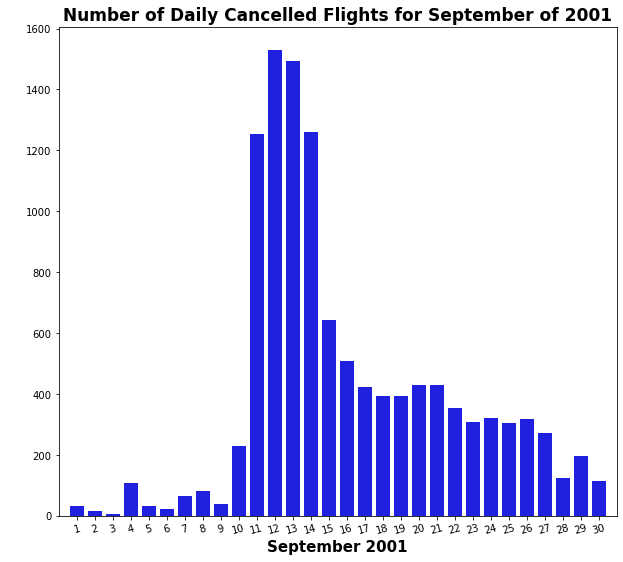

In [18]:
## Creating a barplot to show how many flights were cancelled for each day of the month.
plt.figure(figsize = [10, 9])
sns.barplot(data=df_sums, y='CANCELLED', x='DAY_OF_MONTH', color='blue')
plt.xticks(rotation=15);
plt.xlabel('September 2001', fontsize=15.0, fontweight='bold')
plt.ylabel(' ', fontsize=15.0, fontweight='bold')
plt.title('Number of Daily Cancelled Flights for September of 2001', fontsize=17.0, fontweight='bold')
plt.xlim((-1, 30));

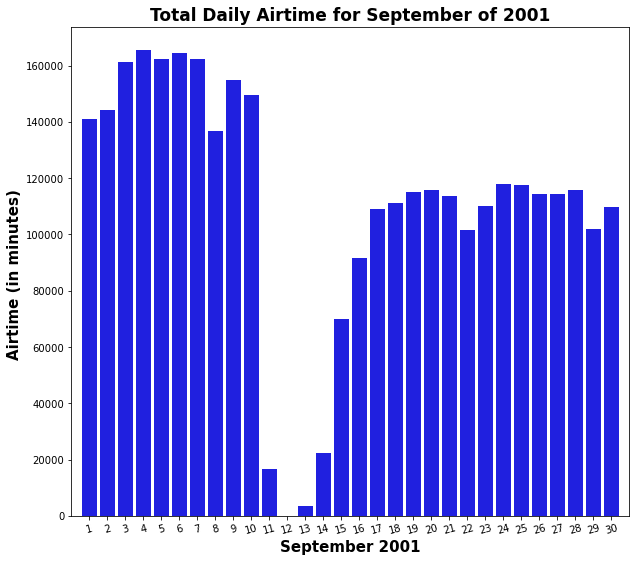

In [20]:
## Creating a barplot to show how many flights were cancelled for each day of the month.
plt.figure(figsize = [10, 9])
sns.barplot(data=df_sums, y='AIR_TIME', x='DAY_OF_MONTH', color='blue')
plt.xticks(rotation=15);
plt.xlabel('September 2001', fontsize=15.0, fontweight='bold')
plt.ylabel('Airtime (in minutes) ', fontsize=15.0, fontweight='bold')
plt.title('Total Daily Airtime for September of 2001', fontsize=17.0, fontweight='bold')
plt.xlim((-1, 30));

# Observations #1:

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Leading up to 9/11, there were very few cancelled flights (less than 200 through the 9th, and just over 200 for the 10th).  After the terrorist attack on 9/11, there were 4 days including 9/11 where there were over 1200 cancellations.  It was cut in half for the 15th (the first weekend after 9/11...down to 600 cancelled flights).  By the 17th through the 22nd, it went down to around 400 cancelled flights daily.  From the 23rd to the 27th, it went down to around 300.  By the end of the month, the amount of cancellations were nearly normal (100-200).

> For the barplot portraying how many flights were cancelled daily September of 2001...the most unusual and unpredicted point that I noticed was the spike in cancelled flights for 9/10 as compared to every day from 9/1 to 9/9.  I'm not really sure why there would be so many cancelled flights the day before 9/11.  I looked it up, and didn't see any articles written about the uptick in cancelled flights.

> I performed some transformations.  First off I created df_sums, which adds up the sum of each variable for each day of the month.  This makes it way easier to gain insights, and sets up the visuals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unexpected distribution was that 9/10 actually had a large number of cancellations, nearly the amount of the first 9 days of the month combined.  I also found a strange distribution in the barplot showing that the last three days of September had a remarkably low number of cancelled flights.  Seeing on the histogram that the level of flights for the last three days was more like the previous 14 days, one possible conclusion is that by the end of September there were less cancelled flights because less flights were being planned, so there were less of them to cancel.  

> In terms of the tidy,adjust, change the form of data...I found that the df_sums dataset I created was essential for this project.  Having each variable showing totals for each day of the month really sheds light on how everything was effected by 9/11.  It basically set up the exact numbers I wanted to see, a breakdown of each interesting variable by day to day throughout the month.

# Question #2: How did 9/11 effect the total number of flights throughout the month?

In [21]:
## Making a copy so I can have a dataframe that doesn't include cancelled flights.

df_flights = df_clean.copy()

In [22]:
df_flights['CANCELLED'].value_counts()

0.0    30222
1.0    11699
Name: CANCELLED, dtype: int64

In [23]:
## Dropping the Cancelled flights from the data set to look at how many flights actually leave or arrive
## in New York before and after 9/11

df_flights.drop(df_flights.loc[df['CANCELLED']== 1.0].index, inplace=True)

In [24]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30222 entries, 0 to 41919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      30222 non-null  int64  
 1   ORIGIN_CITY_NAME  30222 non-null  object 
 2   DEST_CITY_NAME    30222 non-null  object 
 3   DEST_STATE_NM     30222 non-null  object 
 4   DEP_DELAY_NEW     30222 non-null  float64
 5   ARR_DELAY_NEW     30222 non-null  float64
 6   CANCELLED         30222 non-null  float64
 7   AIR_TIME          30222 non-null  float64
 8   FLIGHTS           30222 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.3+ MB


# Visualization #2: Histogram

Text(0, 0.5, 'Total Flights')

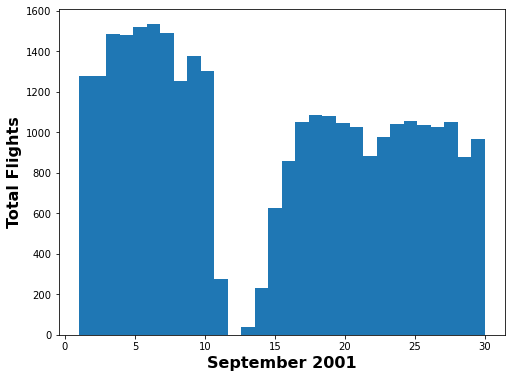

In [25]:
## Creating a histogram showing how many flights there are before and after 9/11 by day.
plt.figure (figsize = [8, 6])
bins = np.arange(0, 31, 0.6)
plt.hist(data=df_flights, x= 'DAY_OF_MONTH', bins=30)
plt.xlabel('September 2001', fontweight='bold', fontsize=16.0)
plt.ylabel('Total Flights', fontweight='bold', fontsize=16.0)

# Observations # 2:

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the histogram, I used the df_flights data set to show the number of flights for each day.  It looks like flights were only running at about 3/4ths of the normal levels after 9/11 occurred.  It was like it settled into a "new normal" at about the 18th as the levels remain consistant in that about 1000 flights occurred every day.  I actually didn't expect that New York would reach a "new normal" so quickly, it only took about 5-7 days to get back to the 3/4ths level of flights.   

> I performed more transformations for this.  I set up df_flights to see how many uncancelled flights day by day (dropped all of the "cancelled" rows).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unexpected distribution from the histogram was that the level of flights for the last three days was more like the previous 14 days.  This is despite the fact that cancellations had gone down to a level not seen since before 9/11.  One possible conclusion is that by the end of September there were less cancelled flights because less flights were being planned, so there were less of them to cancel.  

> In terms of the tidy,adjust, change the form of data...Dropping the number of variables from 12 to 4 was very important.  There were a number of columns that I didn't feel were needed such as Variable 2: Flight Date...why would I have the full date and time (which always showed 12:00am anyways) when I could just have the Day_of_Month variable which simply showed the day of the month number.  Otherwise, the data set was already pretty clean, a few columns had NaN values but I either dropped them or turned NaN values into 0.0 for visualization purposes.

# Bivariate Exploration

## Investigating Relationships of Variables:


> For the Bivariate Exploration, I will start by creating a new variable called "TOTAL_DELAYS" which adds up both Departure and Arrival Delays (some flights had both of them) in the dataset df_flights.  I will also create a new dataframe called "df_delays" which only contains flights that had some form of delay.  (Cancelled flights and non-delayed flights were dropped).

> I also created a new datafraame "df_flights2" which drops all TOTAL_DELAYS that are 300 minutes or above.  I did this because the values of 300 and more were outliers that made the scatterplots less effective. I also created a new column "FORM_OF_DELAY" which specifies whether flights had: BOTH, ARRIVAL, DEPARTURE or NONE in terms of delay.

> I will be looking at delays on a day to day basis to find patterns.  I will also divide the month into three sections and compare the delays by section of month.  

In [26]:
# Created "TOTAL_DELAYS" variable in df_flights
df_flights["TOTAL_DELAYS"] = df_flights["ARR_DELAY_NEW"] + df_flights["DEP_DELAY_NEW"]

In [27]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30222 entries, 0 to 41919
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      30222 non-null  int64  
 1   ORIGIN_CITY_NAME  30222 non-null  object 
 2   DEST_CITY_NAME    30222 non-null  object 
 3   DEST_STATE_NM     30222 non-null  object 
 4   DEP_DELAY_NEW     30222 non-null  float64
 5   ARR_DELAY_NEW     30222 non-null  float64
 6   CANCELLED         30222 non-null  float64
 7   AIR_TIME          30222 non-null  float64
 8   FLIGHTS           30222 non-null  float64
 9   TOTAL_DELAYS      30222 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.5+ MB


In [28]:
# Created df_delays dataframe to have only flights that had delays (arrival and/or departure). 
df_delays = df_flights[df_flights['TOTAL_DELAYS'] > 0.0]

In [29]:
df_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13841 entries, 2 to 41919
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      13841 non-null  int64  
 1   ORIGIN_CITY_NAME  13841 non-null  object 
 2   DEST_CITY_NAME    13841 non-null  object 
 3   DEST_STATE_NM     13841 non-null  object 
 4   DEP_DELAY_NEW     13841 non-null  float64
 5   ARR_DELAY_NEW     13841 non-null  float64
 6   CANCELLED         13841 non-null  float64
 7   AIR_TIME          13841 non-null  float64
 8   FLIGHTS           13841 non-null  float64
 9   TOTAL_DELAYS      13841 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [30]:
# When I was making visualizations, I noticed that there were outliers which made the visual less effective.
# I decided to make df_flights2 which only includes delays below 300 minutes.
df_flights2 = df_flights[df_flights['TOTAL_DELAYS'] < 300]

In [31]:
# Created a new column that shows the form of delay ('FORM_OF_DELAY')
# Putting all delays into four categories: BOTH, ARRIVAL, DEPARTURE and NONE
def delayform(row):  
    if row['ARR_DELAY_NEW'] > 0 and row['DEP_DELAY_NEW'] > 0:
        return 'BOTH'
    elif row['ARR_DELAY_NEW'] > 0 and row['DEP_DELAY_NEW'] == 0:
        return 'ARRIVAL'
    elif row['ARR_DELAY_NEW'] == 0  and row['DEP_DELAY_NEW'] > 0:
        return 'DEPARTURE'
    return 'NONE'

df_flights2['FORM_OF_DELAY'] = df_flights2.apply(lambda row: delayform(row), axis=1)

<ipython-input-31-1643da85a465>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights2['FORM_OF_DELAY'] = df_flights2.apply(lambda row: delayform(row), axis=1)


In [32]:
df_flights2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29914 entries, 0 to 41919
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      29914 non-null  int64  
 1   ORIGIN_CITY_NAME  29914 non-null  object 
 2   DEST_CITY_NAME    29914 non-null  object 
 3   DEST_STATE_NM     29914 non-null  object 
 4   DEP_DELAY_NEW     29914 non-null  float64
 5   ARR_DELAY_NEW     29914 non-null  float64
 6   CANCELLED         29914 non-null  float64
 7   AIR_TIME          29914 non-null  float64
 8   FLIGHTS           29914 non-null  float64
 9   TOTAL_DELAYS      29914 non-null  float64
 10  FORM_OF_DELAY     29914 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.7+ MB


In [33]:
df_flights2['FORM_OF_DELAY'].value_counts()

NONE         16381
BOTH          6516
DEPARTURE     4275
ARRIVAL       2742
Name: FORM_OF_DELAY, dtype: int64

In [34]:
# Dropping all of the flights with no delay from "df_flights2" in order to make the visualization look better
df_flights2 = df_flights2[df_flights2['TOTAL_DELAYS'] > 0]

In [35]:
df_flights2['FORM_OF_DELAY'].value_counts()

BOTH         6516
DEPARTURE    4275
ARRIVAL      2742
Name: FORM_OF_DELAY, dtype: int64

# Visualization #1: Scatterplot

Text(0, 0.5, 'Arrival Delays (in minutes)')

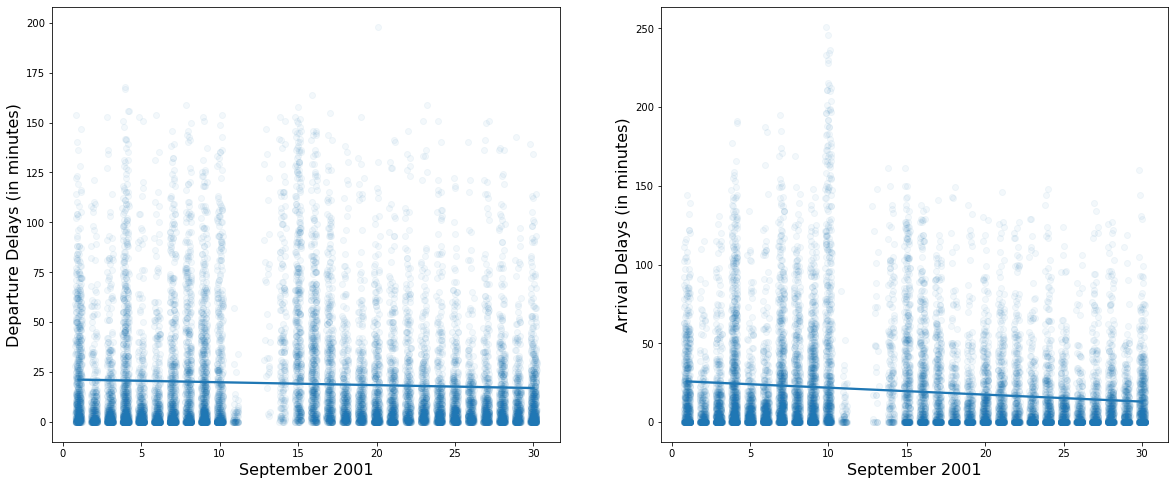

In [36]:
# Comparing Arrival and Departure Delays from New York 
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(20, 8))
dom= sns.regplot(data=df_flights2, x='DAY_OF_MONTH', y='DEP_DELAY_NEW', x_jitter=0.2, scatter_kws={'alpha':1/20}, ax=ax1);
dom.set_xlabel( "September 2001", fontsize=16.0)
dom.set_ylabel( "Departure Delays (in minutes)", fontsize=16.0)

dom= sns.regplot(data=df_flights2, x='DAY_OF_MONTH', y='ARR_DELAY_NEW', x_jitter=0.2, scatter_kws={'alpha':1/20}, ax=ax2);
dom.set_xlabel( "September 2001", fontsize=16.0)
dom.set_ylabel( "Arrival Delays (in minutes)", fontsize=16.0)

## Observations #1:
### I see the biggest difference I see between departure and arrival delays is that the number of arrival delays trended down more than the number of departure delays. This shows that the airports in New York tended to have more delays with departing flights than with arriving flights.  

### One interesting day to look at is September 10th...there seems to be an excessive number of arrival delays that is unexplainable based on my research.

## Visualization #2: Box Plot

In [37]:
# Creating a new column for "SECTION_OF_MONTH" to divide the month into three sections for comparison.
conditions = [
    (df_delays['DAY_OF_MONTH'] <= 10),
    (df_delays['DAY_OF_MONTH'] > 10) & (df_delays['DAY_OF_MONTH'] <= 20),
    (df_delays['DAY_OF_MONTH'] > 20) & (df_delays['DAY_OF_MONTH'] <= 30)
    ]

# Making the list of values to use.
values = ['Sept. 1-10', 'Sept. 11-20', 'Sept. 21-30']

# Creating new column.
df_delays['SECTION_OF_MONTH'] = np.select(conditions, values)

df_delays.head()

<ipython-input-37-8656cce5d54c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delays['SECTION_OF_MONTH'] = np.select(conditions, values)


,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,TOTAL_DELAYS,SECTION_OF_MONTH
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,10.0,Sept. 1-10
7,1,"Albany, NY","Baltimore, MD",Maryland,13.0,8.0,0.0,57.0,1.0,21.0,Sept. 1-10
8,1,"Albany, NY","Baltimore, MD",Maryland,20.0,15.0,0.0,58.0,1.0,35.0,Sept. 1-10
10,1,"Albany, NY","Boston, MA",Massachusetts,8.0,6.0,0.0,35.0,1.0,14.0,Sept. 1-10
12,1,"Albany, NY","Charlotte, NC",North Carolina,6.0,17.0,0.0,107.0,1.0,23.0,Sept. 1-10


In [38]:
df_delays['SECTION_OF_MONTH'].value_counts()

Sept. 1-10     6323
Sept. 21-30    4500
Sept. 11-20    3018
Name: SECTION_OF_MONTH, dtype: int64

In [39]:
# Creating a new column for "SECTION_OF_MONTH" to divide the month into three sections for comparison.
conditions = [
    (df_flights['DAY_OF_MONTH'] <= 10),
    (df_flights['DAY_OF_MONTH'] > 10) & (df_flights['DAY_OF_MONTH'] <= 20),
    (df_flights['DAY_OF_MONTH'] > 20) & (df_flights['DAY_OF_MONTH'] <= 30)
    ]

# Assigning the values.
values = ['Sept. 1-10', 'Sept. 11-20', 'Sept. 21-30']

# Creating new column.
df_flights['SECTION_OF_MONTH'] = np.select(conditions, values)

df_flights.head()

,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,TOTAL_DELAYS,SECTION_OF_MONTH
0,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,111.0,1.0,0.0,Sept. 1-10
1,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,130.0,1.0,0.0,Sept. 1-10
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,10.0,Sept. 1-10
3,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,50.0,1.0,0.0,Sept. 1-10
4,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,52.0,1.0,0.0,Sept. 1-10


Text(0, 0.5, 'Delays (in minutes) ')

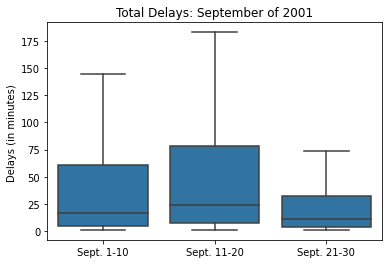

In [42]:
# Looking at the delays for each section of the month.  
sect = sns.boxplot(data=df_delays, x='SECTION_OF_MONTH', y='TOTAL_DELAYS', color='tab:blue', showfliers= False)
sect.set_title( "Total Delays: September of 2001")
sect.set_xlabel( " ")
sect.set_ylabel( "Delays (in minutes) ")

Text(0, 0.5, 'Departure Delays (in minutes) ')

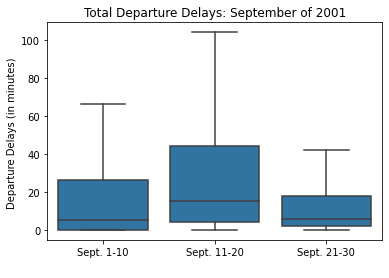

In [43]:
# Looking at the departure delays for each section.
sectd= sns.boxplot(data=df_delays, x='SECTION_OF_MONTH', y='DEP_DELAY_NEW', color='tab:blue', showfliers= False)
sectd.set_title( "Total Departure Delays: September of 2001")
sectd.set_xlabel( " ")
sectd.set_ylabel( "Departure Delays (in minutes) ")

Text(0, 0.5, 'Arrival Delays (in minutes) ')

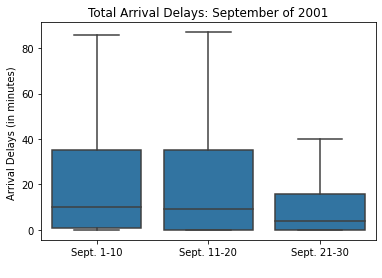

In [44]:
# Looking at the arrival delays for each section.  
secta= sns.boxplot(data=df_delays, x='SECTION_OF_MONTH', y='ARR_DELAY_NEW', color='tab:blue', showfliers= False)
secta.set_title( "Total Arrival Delays: September of 2001")
secta.set_xlabel( " ")
secta.set_ylabel( "Arrival Delays (in minutes) ")

## Observations #2:
## Looking at total delays, I can see that delays increased in number from Sept. 1-10 to Sept. 11-20, and then decreased quite a bit for the last ten days of the month (Sept. 21-30).  
## Comparing departure and arrival delays, I can see that the first ten days (Sept. 1-10) had many more arrival delays than departure, and was actually quite similar to the arrival delays for the 11th-20th.  Departure delays increased quite a bit from the first ten days (1-10) to the second section directly after 9/11 (11th-20th).  All of the delays from the 21st-30th seemed to decrease quite a bit possibly because there were so many less flights scheduled.

## Visualization # 3: Heatmap

In [53]:
# Creating a new column 'FORM_OF_DELAY' to show what which kind of delay each flight had.
conditions = [
    (df_delays['DEP_DELAY_NEW'] > 0) & (df_delays['ARR_DELAY_NEW'] > 0),
    (df_delays['DEP_DELAY_NEW'] > 0) & (df_delays['ARR_DELAY_NEW'] == 0.0),
    (df_delays['DEP_DELAY_NEW'] == 0.0) & (df_delays['ARR_DELAY_NEW'] > 0)
    ]

# Creating list of values.
values = ['BOTH', 'DEPARTURE', 'ARRIVAL']

# Creating new column
df_delays['FORM_OF_DELAY'] = np.select(conditions, values)

df_delays.head()

<ipython-input-53-ff2cbdd1b024>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delays['FORM_OF_DELAY'] = np.select(conditions, values)


,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,TOTAL_DELAYS,SECTION_OF_MONTH,FORM_OF_DELAY
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,10.0,Sept. 1-10,DEPARTURE
7,1,"Albany, NY","Baltimore, MD",Maryland,13.0,8.0,0.0,57.0,1.0,21.0,Sept. 1-10,BOTH
8,1,"Albany, NY","Baltimore, MD",Maryland,20.0,15.0,0.0,58.0,1.0,35.0,Sept. 1-10,BOTH
10,1,"Albany, NY","Boston, MA",Massachusetts,8.0,6.0,0.0,35.0,1.0,14.0,Sept. 1-10,BOTH
12,1,"Albany, NY","Charlotte, NC",North Carolina,6.0,17.0,0.0,107.0,1.0,23.0,Sept. 1-10,BOTH


In [54]:
# Creating a new column for "SECTION_OF_MONTH" to divide the month into three sections for comparison.
conditions = [
    (df_clean['DAY_OF_MONTH'] <= 10),
    (df_clean['DAY_OF_MONTH'] > 10) & (df_clean['DAY_OF_MONTH'] <= 20),
    (df_clean['DAY_OF_MONTH'] > 20) & (df_clean['DAY_OF_MONTH'] <= 30)
    ]

# List of values
values = ['Sept. 1-10', 'Sept. 11-20', 'Sept. 21-30']

# Creating new column
df_clean['SECTION_OF_MONTH'] = np.select(conditions, values)

df_clean.head()

,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,SECTION_OF_MONTH
0,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,111.0,1.0,Sept. 1-10
1,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,130.0,1.0,Sept. 1-10
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,Sept. 1-10
3,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,50.0,1.0,Sept. 1-10
4,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,52.0,1.0,Sept. 1-10


In [55]:
# Creating new dataframe 'section_sums' to show how many flights had each form of delay.
section_sums = df_delays.groupby(['SECTION_OF_MONTH', 'FORM_OF_DELAY']).size()

In [56]:
# Setting the count as the index
section_sums = section_sums.reset_index(name='count')

In [57]:
section_sums

,SECTION_OF_MONTH,FORM_OF_DELAY,count
0,Sept. 1-10,ARRIVAL,1674
1,Sept. 1-10,BOTH,3170
2,Sept. 1-10,DEPARTURE,1479
3,Sept. 11-20,ARRIVAL,306
4,Sept. 11-20,BOTH,1741
5,Sept. 11-20,DEPARTURE,971
6,Sept. 21-30,ARRIVAL,762
7,Sept. 21-30,BOTH,1912
8,Sept. 21-30,DEPARTURE,1826


In [58]:
section_sums = section_sums.pivot(index='SECTION_OF_MONTH', columns='FORM_OF_DELAY', values='count')

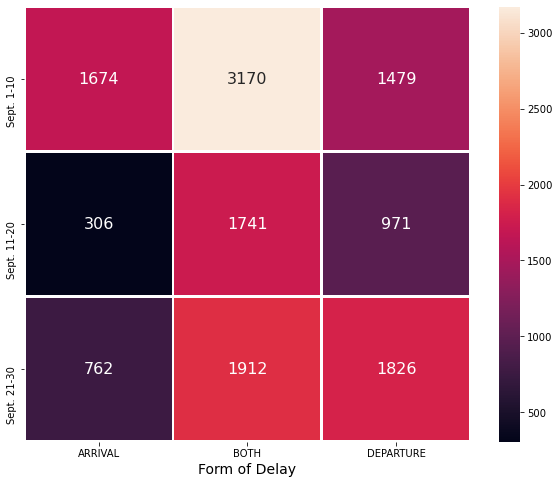

In [59]:
# Creating heatmap to show how many flights had delays for each section of the month and what kind of delays
# each flight had.
fig, fod = plt.subplots (figsize=(10,8))
fod = sns.heatmap(section_sums, annot=True, fmt= 'd', linewidths=2, linecolor='white', annot_kws= {"size":16})
fod.set_xlabel('Form of Delay', fontsize=14)
fod.set_ylabel('');


## Observations #3:
### I created this heatmap to compare how many flights got delayed either by arrival, departure, or both as compared by each section of the month. 
### It is actually in the first 10 days (1st-10th) that the most delays occurred for arrival and for both together. Departure delays peaked at the end of the month (21st-30th).  My guess is that security measures increased dramatically causing more flights to get delayed leaving New York.
### For arrivals, the delays were excessive the first ten days, went drastically down for the 11th-20th (probably because so many flights were cancelled post 9-11).  Then arrivals went back up to 762, but still there seemed to be far less delays by arrival the 2nd and 3rd sections of the month as compared to departure and both delays.
### I'm not really sure why the number of flights delayed by both is so high for the 1st-10th...it might be partially because there were so many more flights scheduled and far less cancellations pre-9/11.

In [61]:
# I am creating the dataframe "df_sections" to show the statistics grouped by which section 
# of the month they fall under.  I will be making visual(s) based on df_sections for Part II.
df_sections = df_clean.groupby(['SECTION_OF_MONTH']).sum()

In [62]:
df_sections['SECTION_OF_MONTH'] = df_sections.index

In [63]:
df_sections.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Sept. 1-10 to Sept. 21-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      3 non-null      int64  
 1   DEP_DELAY_NEW     3 non-null      float64
 2   ARR_DELAY_NEW     3 non-null      float64
 3   CANCELLED         3 non-null      float64
 4   AIR_TIME          3 non-null      float64
 5   FLIGHTS           3 non-null      float64
 6   SECTION_OF_MONTH  3 non-null      object 
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ bytes


In [64]:
df_sections

,DAY_OF_MONTH,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,SECTION_OF_MONTH
SECTION_OF_MONTH,,,,,,,
Sept. 1-10,81381,144786.0,181105.0,629.0,1541903.0,14618.0,Sept. 1-10
Sept. 11-20,225991,105178.0,85894.0,8326.0,655131.0,14617.0,Sept. 11-20
Sept. 21-30,320862,73945.0,63950.0,2744.0,1116657.0,12686.0,Sept. 21-30


In [65]:
df_sections['TOTAL_DELAYS'] = df_sections['DEP_DELAY_NEW'] + df_sections['ARR_DELAY_NEW']

In [66]:
df_sections

,DAY_OF_MONTH,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,SECTION_OF_MONTH,TOTAL_DELAYS
SECTION_OF_MONTH,,,,,,,,
Sept. 1-10,81381,144786.0,181105.0,629.0,1541903.0,14618.0,Sept. 1-10,325891.0
Sept. 11-20,225991,105178.0,85894.0,8326.0,655131.0,14617.0,Sept. 11-20,191072.0
Sept. 21-30,320862,73945.0,63950.0,2744.0,1116657.0,12686.0,Sept. 21-30,137895.0


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is clear that 9/11 caused departure from New York delays to get far worse as compared to arrival delays.  The month started off with slightly more arrival delays, then for the 2nd and 3rd sections of the month it was nearly 3:1 with departure delays as compared to arrival delays when it came to number of flights (as seen on the heatmap, visualization #3).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One observation is that flights having both arrival and departure delays far exceeded those who only had one or the other.  It might just be an overall aspect of air travel, especially knowing the highest number of delays from both occurred in the 1st ten days. (especially on the 4th and on the 10th, as seen on the scatterplot).
I will say that I find it interesting that the number of flights is nearly the same from the 1st ten days to the 2nd ten days (14618 to 14617). The difference of course was going from 629 cancellations (1st-10th) to 8326 cancellations (11th-20th). 

## Multivariate Exploration

## Visualization #1: Facet Plot

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41921 entries, 0 to 41920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DAY_OF_MONTH      41921 non-null  int64  
 1   ORIGIN_CITY_NAME  41921 non-null  object 
 2   DEST_CITY_NAME    41921 non-null  object 
 3   DEST_STATE_NM     41921 non-null  object 
 4   DEP_DELAY_NEW     41921 non-null  float64
 5   ARR_DELAY_NEW     41921 non-null  float64
 6   CANCELLED         41921 non-null  float64
 7   AIR_TIME          41921 non-null  float64
 8   FLIGHTS           41921 non-null  float64
 9   SECTION_OF_MONTH  41921 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.2+ MB


In [70]:
# Creating column "TOTAL_DELAYS" for df_clean to get a grand total of minutes delayed for each flight.
df_clean["TOTAL_DELAYS"] = df_clean["ARR_DELAY_NEW"] + df_clean["DEP_DELAY_NEW"]

In [71]:
# Creating "SECTION_OF_MONTH" column for df_clean to look at all data through the lens of each section of the month.
df_clean.loc[np.logical_and(df_clean['DAY_OF_MONTH'].gt(0), np.less_equal(df_clean['DAY_OF_MONTH'], 10)), 'SECTION_OF_MONTH'] = 'Sept. 1-10'
df_clean.loc[np.logical_and(df_clean['DAY_OF_MONTH'].gt(10), np.less_equal(df_clean['DAY_OF_MONTH'], 20)), 'SECTION_OF_MONTH'] = 'Sept. 11-20'
df_clean.loc[np.logical_and(df_clean['DAY_OF_MONTH'].gt(20), np.less_equal(df_clean['DAY_OF_MONTH'], 30)), 'SECTION_OF_MONTH'] = 'Sept. 21-30'
df_clean.head()
    

,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,SECTION_OF_MONTH,TOTAL_DELAYS
0,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,111.0,1.0,Sept. 1-10,0.0
1,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,130.0,1.0,Sept. 1-10,0.0
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,Sept. 1-10,10.0
3,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,50.0,1.0,Sept. 1-10,0.0
4,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,52.0,1.0,Sept. 1-10,0.0


In [72]:
df_clean['SECTION_OF_MONTH'].value_counts()

Sept. 1-10     14618
Sept. 11-20    14617
Sept. 21-30    12686
Name: SECTION_OF_MONTH, dtype: int64

In [73]:
# Creating "FORM_OF_DELAY" column to show if flights had "BOTH", "ARRIVAL", "DEPARTURE" or "NONE" in terms of delays
def delayform(row):  
    if row['ARR_DELAY_NEW'] > 0 and row['DEP_DELAY_NEW'] > 0:
        return 'BOTH'
    elif row['ARR_DELAY_NEW'] > 0 and row['DEP_DELAY_NEW'] == 0:
        return 'ARRIVAL'
    elif row['ARR_DELAY_NEW'] == 0  and row['DEP_DELAY_NEW'] > 0:
        return 'DEPARTURE'
    return 'NONE'

df_clean['FORM_OF_DELAY'] = df_clean.apply(lambda row: delayform(row), axis=1)

In [74]:
df_clean.head()

,DAY_OF_MONTH,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEST_STATE_NM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,SECTION_OF_MONTH,TOTAL_DELAYS,FORM_OF_DELAY
0,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,111.0,1.0,Sept. 1-10,0.0,NONE
1,1,"Albany, NY","Atlanta, GA",Georgia,0.0,0.0,0.0,130.0,1.0,Sept. 1-10,0.0,NONE
2,1,"Albany, NY","Atlanta, GA",Georgia,10.0,0.0,0.0,120.0,1.0,Sept. 1-10,10.0,DEPARTURE
3,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,50.0,1.0,Sept. 1-10,0.0,NONE
4,1,"Albany, NY","Baltimore, MD",Maryland,0.0,0.0,0.0,52.0,1.0,Sept. 1-10,0.0,NONE


In [77]:
# Creating df_clean2 to get rid of some outliers (all above 500), and the flights without delay...it helps
# to make the visual a little more zoomed in for the facet grid.
df_clean2 = df_clean.loc[(df_clean['TOTAL_DELAYS'] < 500) & (df_clean['TOTAL_DELAYS'] > 0)]

In [78]:
# Also making "df_clean2" eliminate air times of 0 (the cancelled flights)
df_clean2 = df_clean2.loc[(df_clean2['AIR_TIME'] > 0)]

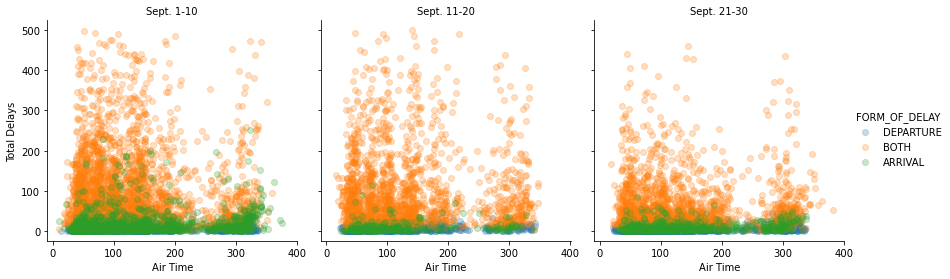

In [89]:
# Looking at the comparisons of air time for flights as compared to total delays for each section of the month.
g = sns.FacetGrid(data=df_clean2, col='SECTION_OF_MONTH', hue='FORM_OF_DELAY', height=4, col_wrap=3)
g.map(sns.regplot, 'AIR_TIME', 'TOTAL_DELAYS', fit_reg=False, scatter_kws={'alpha': 1/4})
g.set_ylabels('Total Delays')
g.set_xlabels('Air Time')
g.set_titles('{col_name}') 
g.add_legend()

## Visualization #2: Plot Matrix or Scatterplot with multiple encodings

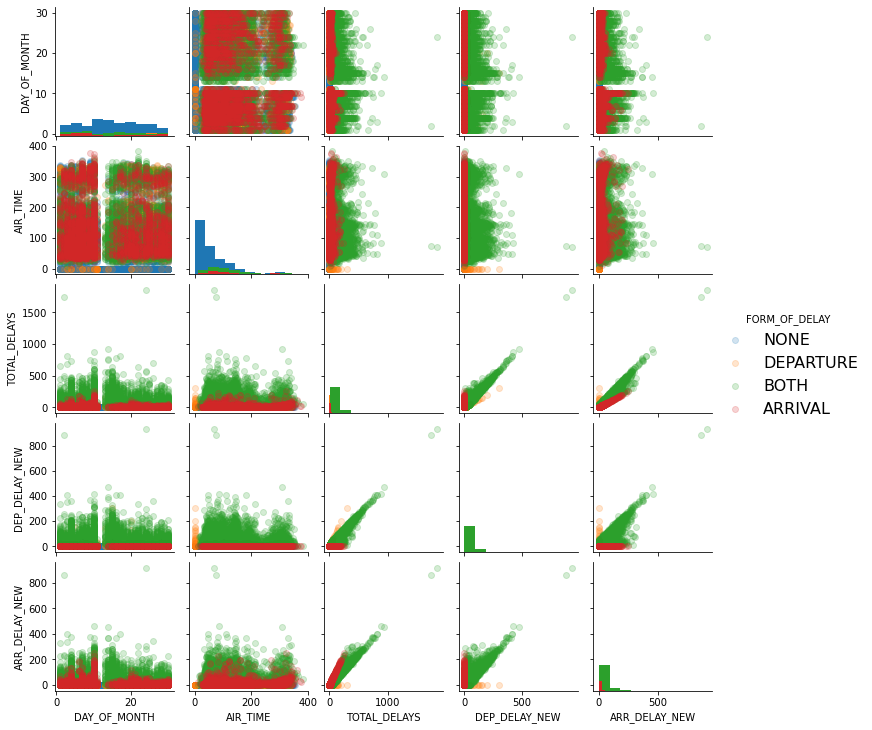

In [136]:
g = sns.PairGrid(data=df_clean,hue='FORM_OF_DELAY', vars=['DAY_OF_MONTH', 'AIR_TIME', 'TOTAL_DELAYS','DEP_DELAY_NEW', 'ARR_DELAY_NEW'], height = 2.0)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.2)
g.add_legend(fontsize=16)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Facet Grid (#1) affirms that arrival and both delays were very prevelant in the first ten days.  It also shows that there were many less flights in the second ten days (11-20) and in the final ten days (21-30).  The Plot Matrix (#2) also affirms this same information.  (the red color-Arrival is far less prevelant after the first ten days).  

### Were there any interesting or surprising interactions between features?

> On the Facet Grid the third section of the month seems to have much shorter delays overall...there were much less plots of 200 and more minutes as compared to the first and second sessions.  On the Plot Matrix, shorter flights seem to have as much delay oftentimes as longer flights (no real difference between the two). 

## Conclusions
> I will summarize the findings through going variable by variable.  When I refer to each Section, Section 1= 1st to 10th, Section 2= 11th to 20th, Section 3 = 21st to 30th:
> 1. Cancelled flights started off in Section 1 to be extremely low (all days below 200 cancelled except the 10th).  The first half of Section 2 have anywhere from 1200 to 1500 cancellations daily, it gradually came down to around 400 by the end of Section 2...then gradually went from the 300's to nearly 100 in Section 3.  This implies that it was starting to go back to pre-9/11 levels, but not quite there.

> 2. In terms of Total Airtime of all flights arriving and departing New York, it stayed at 140,000 miles or higher for Section 1.  9/11 had only morning flights, then the rest of the flights for 9/11 and 9/12 were cancelled....Airtime was extremely low until it finally surpassed 100,000 miles on the 17th.  Airtime stuck near the 100,000-115,000 level for the rest of the month, implying that less flights were scheduled as compared to Section 1.  The number of scheduled flights (including cancelled and delayed flights) stayed consistantly through most of the month until it dropped off on the last three days (from 1300-1600 most of the month, down to 1050-1200 the last three days).

> 3.  Arrival delays peaked on the 4th and on the 10th, and overall were the heaviest in Section 1, and the middle part of Section 2 (14th= 11,067 minutes, 15th= 26,022 minutes, 16th= 16,513 minutes) which was the first weekend after 9/11.  Departure delays were less than arrival delays for most of the 1st Section, but were higher than Arrival delays for the 2nd and 3rd sections.  Departure delays also peaked on the 4th and on the 10th, and the middle part of Section 2 (14th-17th).  I think New York tended to have less departure delays than arrival delays for the first 10 days, and when 9/11 happened, security concerns probably caused that to flip (more departure delays than arrival) since the attacks happened in New York.

> 4.  Strangely, the two days with the most total delays (in minutes) were the 10th (68,430 minutes) and the 4th (60,936 minutes).  Total delays were highest for patches of Section 1 and that middle patch of Section 2.  Later in the month saw fewer delays partially because there were less flights.

> 5. In conclusion, it seems like 9/11 had a dramatic effect on air travel coming to and leaving from New York.  It doesn't even take into account how much longer it took passengers to go through the newly imposed security measures (how long did it take passengers from the time of arrival at the airport to actually boarding the plane?). It must have been quite dramatic to go from 1400 to 1500-ish non cancelled flights to no flights at all (the rest of 9/11 and 9/12).  
By the end of the month, things were not completely back to normal yet, but it seemed to settle into a "new normal" level in terms of flights, delays and cancellations.  Obviously, traveling by plane was never the same after 9/11...but by the end of September it seemed that levels were at least at about 75% in terms of flights and airtime.  

In [139]:
df_delays.to_csv('/Users/seanward/Desktop/UDACITY/Project 4/Data Sets/df_delays.csv', index=False)

In [140]:
df_sections.to_csv('/Users/seanward/Desktop/UDACITY/Project 4/Data Sets/df_sections.csv', index=False)

In [141]:
df_sums.to_csv('/Users/seanward/Desktop/UDACITY/Project 4/Data Sets/df_sums.csv', index=False)

In [142]:
df_flights2.to_csv('/Users/seanward/Desktop/UDACITY/Project 4/Data Sets/df_flights2.csv', index=False)